Import Lib

In [ ]:
import kagglehub
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

Load the dataset from kaggle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("robikscube/eye-state-classification-eeg-dataset")

print("Path to dataset files:", path)

100%|██████████| 827k/827k [00:00<00:00, 1.23MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/robikscube/eye-state-classification-eeg-dataset/versions/1


In [ ]:
df = pd.read_csv(path + "/EEG_Eye_State_Classification.csv")

In [ ]:
df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [ ]:
print(df.head())
print("Shape:", df.shape)


       AF3       F7       F3      FC5       T7       P7       O1       O2  \
0  4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1  4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2  4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3  4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4  4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   

        P8       T8      FC6       F4       F8      AF4  eyeDetection  
0  4222.05  4238.46  4211.28  4280.51  4635.90  4393.85             0  
1  4210.77  4226.67  4207.69  4279.49  4632.82  4384.10             0  
2  4207.69  4222.05  4206.67  4282.05  4628.72  4389.23             0  
3  4217.44  4235.38  4210.77  4287.69  4632.31  4396.41             0  
4  4210.77  4244.10  4212.82  4288.21  4632.82  4398.46             0  
Shape: (14980, 15)


1 indicates the eye-closed and
0 the eye-open state.

1️⃣ Class Distribution Graph

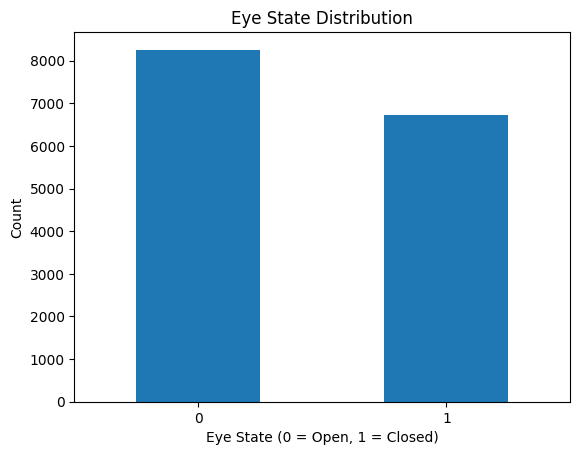

In [ ]:
import matplotlib.pyplot as plt

df["eyeDetection"].value_counts().plot(kind="bar")
plt.title("Eye State Distribution")
plt.xlabel("Eye State (0 = Open, 1 = Closed)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


 Split Features & Target


In [ ]:
X = df.drop("eyeDetection", axis=1)
y = df["eyeDetection"]


Train & Test Split


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

Feature Scaling -> Scaling helps KNN work properly by preventing big numbers from dominating small numbers.

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

 Train KNN Model


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Predections

In [ ]:
y_pred = knn.predict(x_test)


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))



Accuracy: 0.8197596795727636

Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1586
           1       0.82      0.79      0.81      1410

    accuracy                           0.82      2996
   macro avg       0.82      0.82      0.82      2996
weighted avg       0.82      0.82      0.82      2996

